In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
cv2.__version__

'4.5.5'

In [7]:
#loading images 

img1 = cv2.imread("C:/Users/user/Documents/Grad School/Computer Coding/images_for_python/forest.jpg")
img2 = cv2.imread("C:/Users/user/Documents/Grad School/Computer Coding/images_for_python/people-walking.jpg")
type(img1)
print("showing the size of image 1", img1.shape)
print("showing the size of image 2", img2.shape)
img1_reshaped = cv2.resize(img1,(300,300),interpolation= cv2.INTER_AREA)
img2_reshaped = cv2.resize(img2,(300,300),interpolation= cv2.INTER_AREA)
print("showing size of img2_reshaped", img2_reshaped.shape)


showing the size of image 1 (450, 450, 3)
showing the size of image 2 (531, 820, 3)
showing size of img2_reshaped (300, 300, 3)


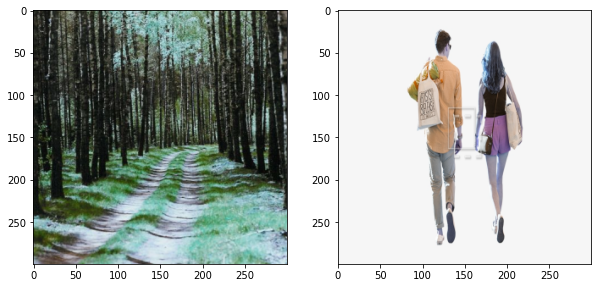

In [8]:
#printing images 
plt.figure(figsize = (10,10))
plt.subplot(1,2,1) #images next to ea other- one row, 2 columns 
plt.imshow(img1_reshaped)
plt.subplot(1,2,2)
plt.imshow(img2_reshaped)

Text(0.5, 1.0, 'Blue Channel')

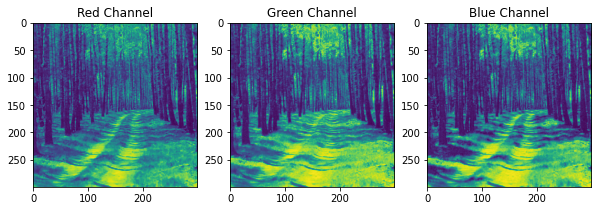

In [9]:
#print RGB images one next to another bracktets x,y dim for 1 chanel/ x,y dim for 2 channel 
plt.figure(figsize = (10,10))
plt.subplot(1,3,1) 
plt.imshow(img1_reshaped[:,:,0])
plt.gca().set_title("Red Channel") #adding title 
plt.subplot(1,3,2)
plt.imshow(img1_reshaped[:,:,1])
plt.gca().set_title("Green Channel")
plt.subplot(1,3,3)
plt.imshow(img1_reshaped[:,:,2])
plt.gca().set_title("Blue Channel")

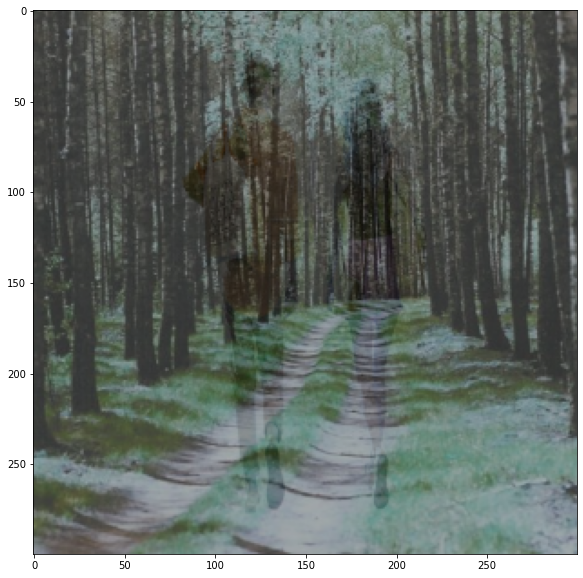

In [10]:
#combining images with a addWeight
dst = cv2.addWeighted(img2_reshaped,0.2,img1_reshaped,0.5,0.1) #decimal numbers is the contrast 
plt.figure(figsize=(10,10))
plt.imshow(dst)

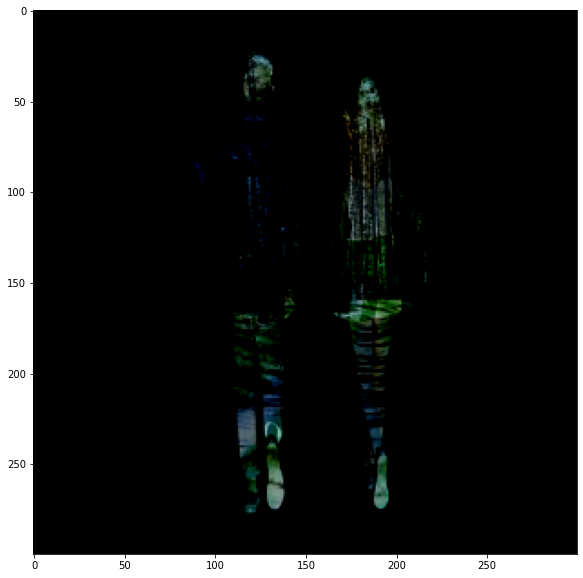

In [12]:
#subtracting images
dst_subt = cv2.subtract(img1_reshaped,img2_reshaped)
plt.figure(figsize= (10,10))
plt.imshow(dst_subt)

(-0.5, 1999.5, 1332.5, -0.5)

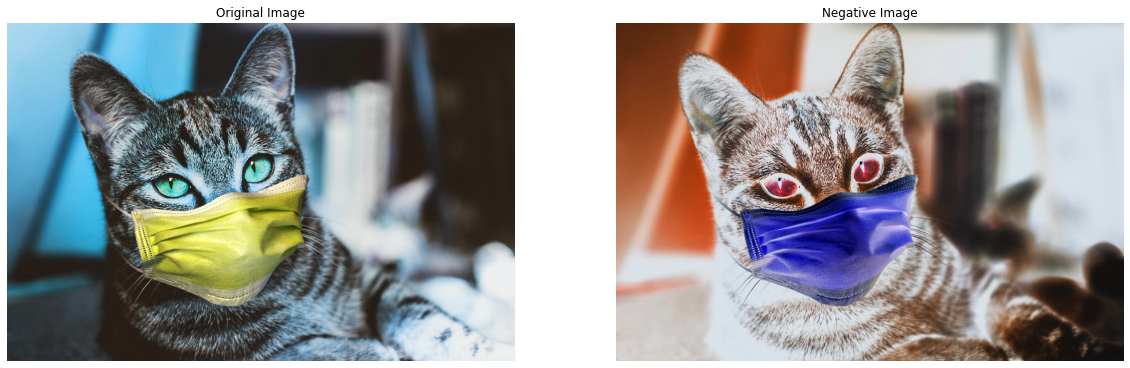

In [21]:
#Negative images
img_cat = cv2.imread("C:/Users/user/Documents/Grad School/Computer Coding/images_for_python/cat.jpg")
negative = 255 - img_cat
plt.figure(figsize= (20,20))
plt.subplot(1,2,1) 
plt.imshow(img_cat)
plt.gca().set_title("Original Image") #set title
plt.axis("off") #taking off the axis 
plt.subplot(1,2,2) 
plt.imshow(negative)
plt.gca().set_title("Negative Image")
plt.axis("off") 

### Bluring images 

Text(0.5, 1.0, 'Gaussianblur Image')

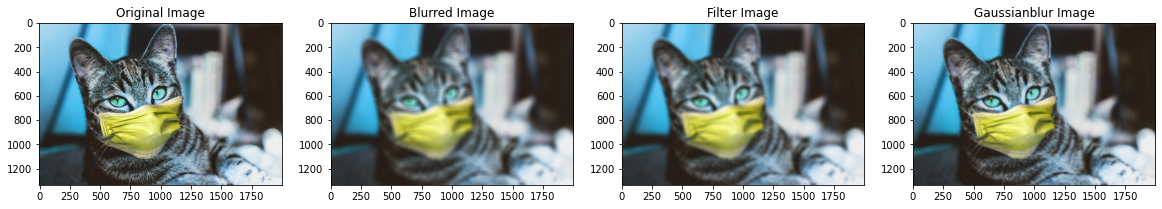

In [18]:
#blurring images
img_blur = cv2.blur(img_cat,(40,40)) #40,40 is a a window of pixels that blur one at a time
img_filter = cv2.boxFilter(img_cat,-5,(30,30), normalize=True)
img_gaussianfilter = cv2.GaussianBlur(img_cat,(41,41), cv2.BORDER_DEFAULT) #blurs the background

plt.figure(figsize=(20,20))
plt.subplot(1,4,1) 
plt.imshow(img_cat)
plt.gca().set_title("Original Image")

plt.subplot(1,4,2) 
plt.imshow(img_blur)
plt.gca().set_title("Blurred Image")


plt.subplot(1,4,3) 
plt.imshow(img_filter)
plt.gca().set_title("Filter Image")

plt.subplot(1,4,4) 
plt.imshow(img_gaussianfilter)
plt.gca().set_title("Gaussianblur Image")




(-0.5, 1999.5, 1332.5, -0.5)

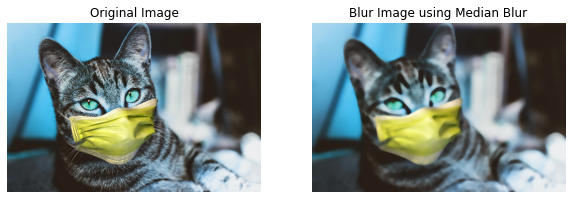

In [23]:
#median blur has to be square matrix
img_median = cv2.medianBlur(img_cat,31) #31 by 31
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_cat)
plt.gca().set_title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_median)
plt.gca().set_title("Blur Image using Median Blur")
plt.axis("off")

## Changing scale of colors

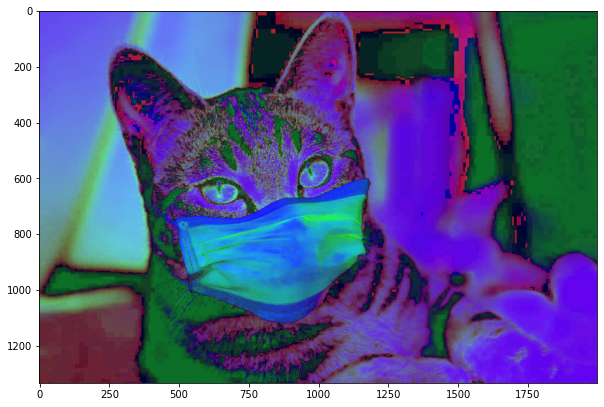

In [24]:
img_cat_hsv = cv2.cvtColor(img_cat, cv2.cv2.COLOR_RGB2HSV)
plt.figure(figsize= (10,10))
plt.imshow(img_cat_hsv)

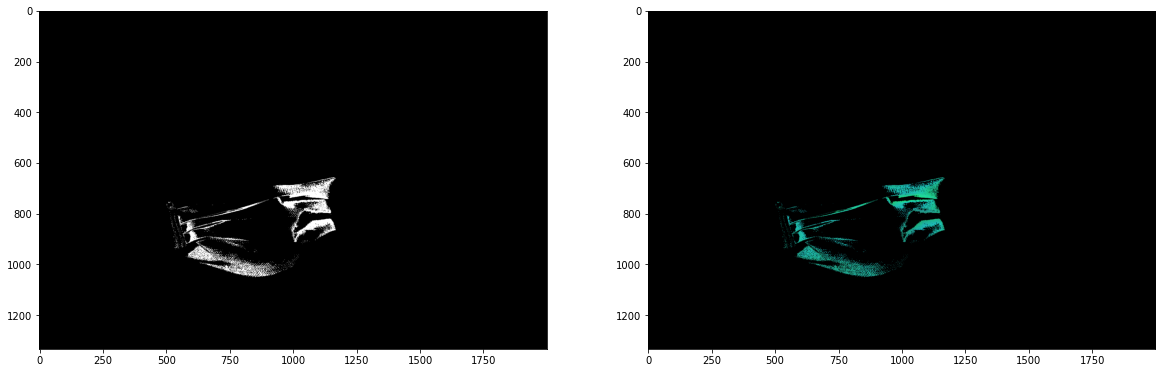

In [32]:
#Segmentation


upper_limit = (119,119,13) #location of the pixel
lower_limit = (191,191,61)
mask = cv2.inRange(img_cat, upper_limit, lower_limit)
results = cv2.bitwise_and(img_cat_hsv, img_cat_hsv, mask=mask)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(mask, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(results)
